In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../data/ice_cream_data.csv', index_col=0)

In [3]:
data.head(3)

,brand,key,author,stars,helpful_yes,helpful_no,text,name,description,rating,rating_count
0,bj,0_bj,Ilovebennjerry,3,10.0,3.0,"Not enough brownies!-Super good, don't get me ...",Salted Caramel Core,Find your way to the ultimate ice cream experi...,3.7,208
1,bj,0_bj,Sweettooth909,5,3.0,0.0,I’m OBSESSED with this pint!-I decided to try ...,Salted Caramel Core,Find your way to the ultimate ice cream experi...,3.7,208
2,bj,0_bj,LaTanga71,3,5.0,2.0,My favorite...More Caramel Please-My caramel c...,Salted Caramel Core,Find your way to the ultimate ice cream experi...,3.7,208


# EDA

In [4]:
brands = list(set(data['brand']))

In [5]:
# find top and bottom 5 flavors in each brand with their avg rating
top5_flavors = {}
bottom5_flavors = {}
for brand in brands:
    top5_flavors[brand] = None
    bottom5_flavors[brand] = None
    flavors_ratings = []
    
    for flavor in set(data[data['brand'] == brand]['name']):
        df_brand = data[data['brand'] == brand]
        
        # check if there are more than 15 ratings
        if df_brand[df_brand['name'] == flavor]['rating_count'].values[0] > 15:
            flavors_ratings.append([flavor, df_brand[df_brand['name'] == flavor]['rating'].values[0]])
    
    # getting length of list of tuples
    lst = len(flavors_ratings) 
    for i in range(0, lst): 
        for j in range(0, lst-i-1): 
            if (flavors_ratings[j][1] < flavors_ratings[j + 1][1]): 
                temp = flavors_ratings[j] 
                flavors_ratings[j]= flavors_ratings[j + 1] 
                flavors_ratings[j + 1]= temp 
    
    top5_flavors[brand] = flavors_ratings[0:5]
    bottom5_flavors[brand] = flavors_ratings[-6:-1]

# create dataframes
top5_df = pd.DataFrame(pd.concat({k: pd.Series(v) for k, v in top5_flavors.items()}), columns=['data'])
top5_df[['flavor','rating']] = pd.DataFrame(top5_df.data.tolist(), index=top5_df.index)
top5_df.reset_index(inplace=True)
top5_df.drop(['data', 'level_1'], axis=1, inplace=True)
top5_df.columns = ['brand', 'flavor', 'rating']

bottom5_df = pd.DataFrame(pd.concat({k: pd.Series(v) for k, v in bottom5_flavors.items()}), columns=['data'])
bottom5_df[['flavor','rating']] = pd.DataFrame(bottom5_df.data.tolist(), index=bottom5_df.index)
bottom5_df.reset_index(inplace=True)
bottom5_df.drop(['data', 'level_1'], axis=1, inplace=True)
bottom5_df.columns = ['brand', 'flavor', 'rating']

In [6]:
bottom5_df.head()

,brand,flavor,rating
0,bj,"Red, White & Blueberry",3.4
1,bj,Chocolate Fudge Brownie,3.4
2,bj,"Wake & "" No Bake "" Cookie Dough Core",3.3
3,bj,Chillin' the Roast™,3.3
4,bj,Coffee Toffee Bar Crunch,2.9


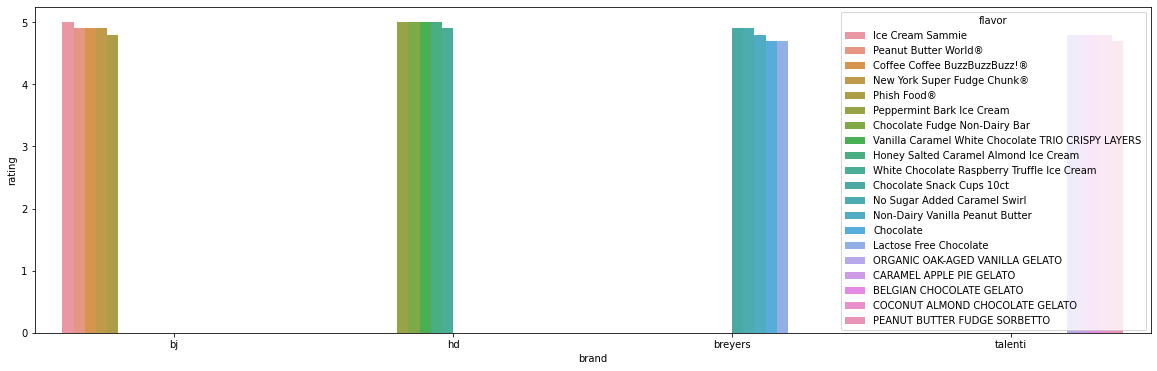

In [7]:
plt.figure(figsize=(20,6))
ax = sns.barplot(x="brand", y="rating", hue="flavor", data=top5_df)

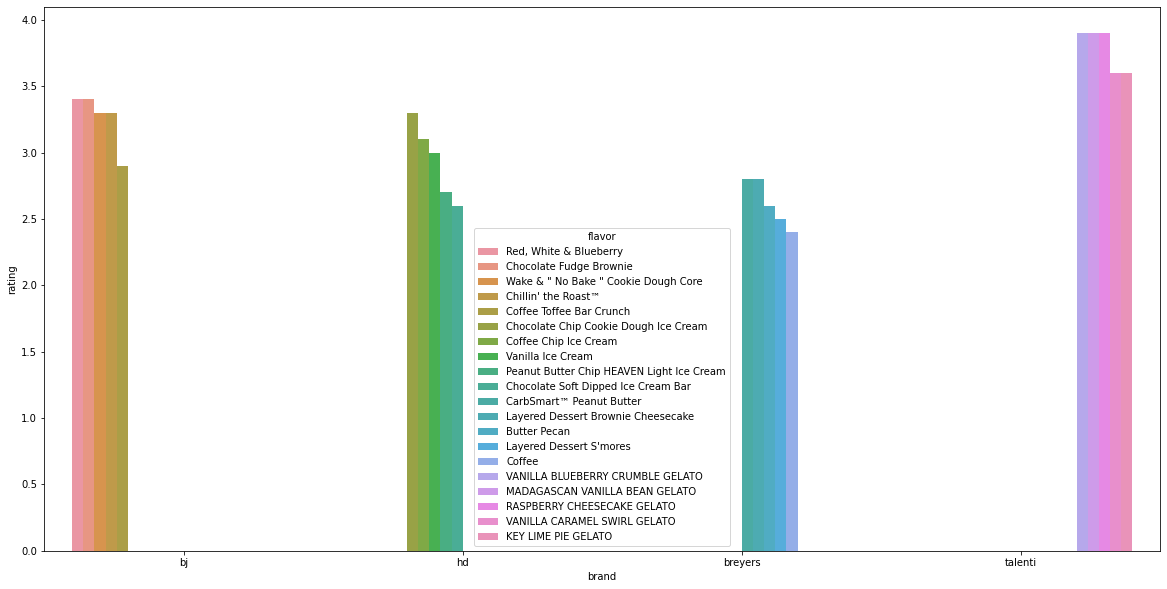

In [8]:
plt.figure(figsize=(20,10))
ax = sns.barplot(x="brand", y="rating", hue="flavor", data=bottom5_df)